In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [30]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna() # aykırı degerler ile rahat ugraşmak için eksik değerlerin hepsini sildik.
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [31]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
# değişkenleri yoğunuk tabanlı skorladık
# yaş ve evlat listesi düşünelim ve listenin bir satırında 17 yaşında 3 çocuklu birey olsun. 
# yaş ve 3 çocuk tek başına normalken, 17 yaşında 3 çocuklu birey aykırıdır.
# işte bu gibi durumları gözlemlemek için kullanılır.

In [32]:
clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1)

In [33]:
clf.fit(df)

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

In [34]:
df_scores=clf.negative_outlier_factor_

In [35]:
np.sort(df_scores)[0:10]
x=np.sort(df_scores)[0:14]
x

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797])

In [36]:
esik_deger=x[13]

In [37]:
esik_deger

-3.823787967755565

In [38]:
aykiri_index=df_scores<esik_deger

In [46]:
df[aykiri_index]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [40]:
?pd.DataFrame.to_records

Signature:
pd.DataFrame.to_records(
    self,
    index=True,
    column_dtypes=None,
    index_dtypes=None,
) -> numpy.recarray
Docstring:
Convert DataFrame to a NumPy record array.

Index will be included as the first field of the record array if
requested.

Parameters
----------
index : bool, default True
    Include index in resulting record array, stored in 'index'
    field or using the index label, if set.
column_dtypes : str, type, dict, default None
    .. versionadded:: 0.24.0

    If a string or type, the data type to store all columns. If
    a dictionary, a mapping of column names and indices (zero-indexed)
    to specific data types.
index_dtypes : str, type, dict, default None
    .. versionadded:: 0.24.0

    If a string or type, the data type to store all index levels. If
    a dictionary, a mapping of index level names and indices
    (zero-indexed) to specific data types.

    This mapping is applied only if `index=True`.

Returns
-------
numpy.recarray
    NumPy nda

In [47]:
res=df[aykiri_index].to_records(index=False)
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [48]:
res[:]

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [49]:
esik_deger_esitlenecek=df[df_scores==esik_deger].to_records(index=False)
esik_deger_esitlenecek # resteki tüm reğerler ieşitleyeceğimiz referans değişkenini seçtik
#aykırılar normalde yukarıdaki gibi iken bu işlem ile indexleri sildik, numpy array'e çevirdi.

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [58]:
res[:]=esik_deger_esitlenecek

In [59]:
res[:]

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [60]:
df[aykiri_index]=pd.DataFrame(res,index=df[aykiri_index].index)

In [61]:
df[aykiri_index]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
49189,0.45,68.6,57.0,756,4.73,4.5,3.19


In [62]:
!pip install missingno

In [2]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

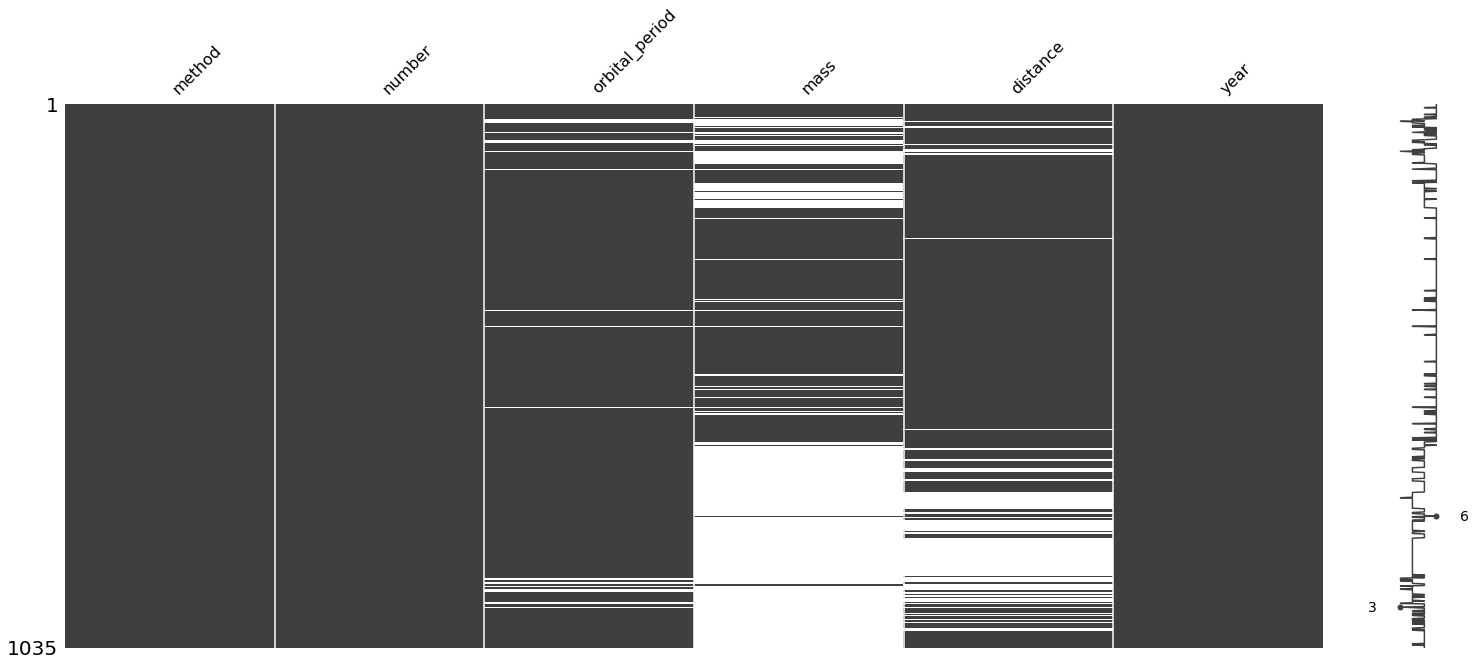

In [6]:
import missingno as msno
msno.matrix(df)

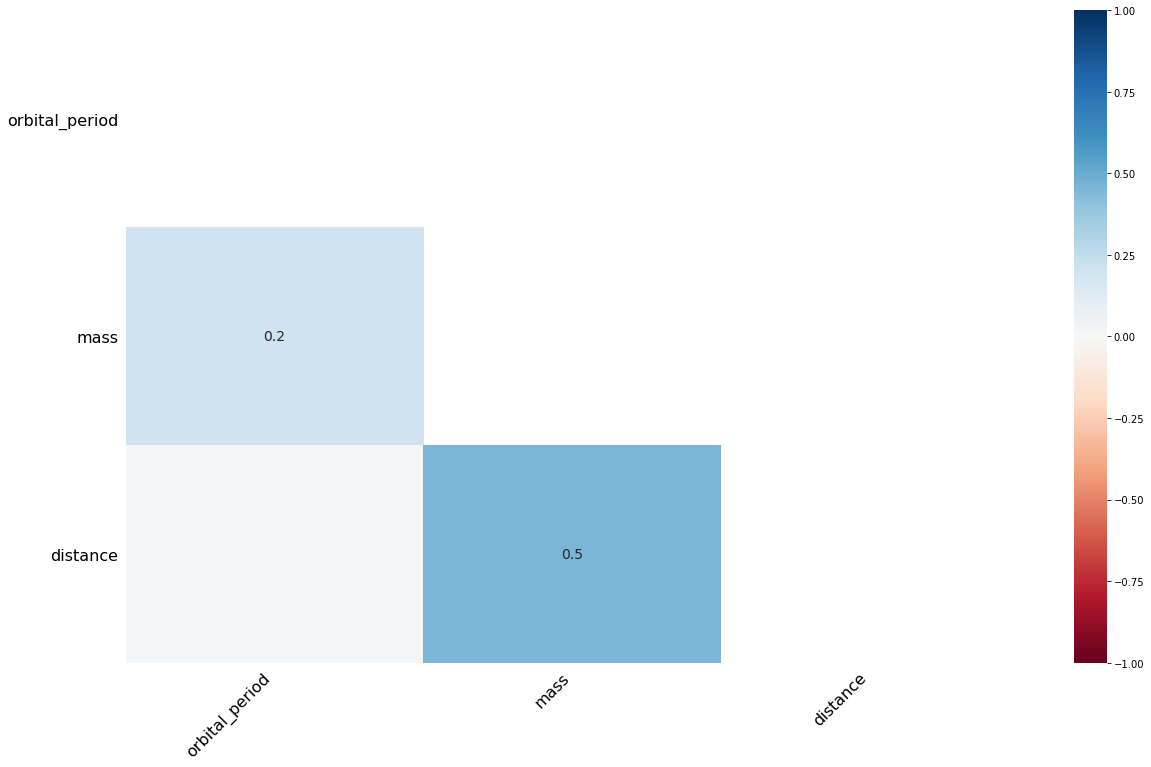

In [7]:
msno.heatmap(df)

In [64]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df
dfc=df

In [65]:
dfc.head()

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0


In [66]:
dfc.apply(lambda x: x.fillna(x.mean()), axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [71]:
df.fillna(df.mean()[0:2])

,maas,V2,V3,departman
0,1.0,7.000000,NaN,IT
1,3.0,6.166667,12.0,IT
2,6.0,5.000000,5.0,IK
3,6.0,8.000000,6.0,IK
4,7.0,12.000000,14.0,IK
5,1.0,6.166667,7.0,IK
6,6.0,6.166667,NaN,IK
7,9.0,2.000000,2.0,IT
8,15.0,3.000000,31.0,IT


In [72]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [78]:
df.groupby("departman").mean()

,maas,V2,V3
departman,,,
IK,4.666667,8.333333,8.0
IT,7.000000,4.000000,15.0


In [77]:
#şimdi maaş değişkenindeki boş değerleri, DEPARTMANA GÖRE doluralım.
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

In [99]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IdaK","IKd","IKd","IsT","IsT"], dtype=object)
V3 = np.array(["IT",np.nan,"dd","dd","dd","dd","dd","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4,
        "departman2" : V3}        
)

df

,maas,departman,departman2
0,1.0,IT,IT
1,3.0,NaN,NaN
2,6.0,IK,dd
3,NaN,IK,dd
4,7.0,IdaK,dd
5,1.0,IKd,dd
6,NaN,IKd,dd
7,9.0,IsT,IT
8,15.0,IsT,IT


In [100]:
df["departman"].mode()

0     IK
1    IKd
2    IsT
dtype: object

In [101]:
df["departman"].fillna(df["departman"].mode()[0])

0      IT
1      IK
2      IK
3      IK
4    IdaK
5     IKd
6     IKd
7     IsT
8     IsT
Name: departman, dtype: object

In [102]:
# eksik değerleri sonrasındaki değerler ile doldurmak istediğimizde,
#method="bfill argümanını ekleriz"
df["departman"].fillna(method = "bfill")

0      IT
1      IK
2      IK
3      IK
4    IdaK
5     IKd
6     IKd
7     IsT
8     IsT
Name: departman, dtype: object

In [103]:

# knn algoritması ile tahmine dayalı deger atama
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [104]:
!pip install ycimpute 

In [105]:
from ycimpute.imputer import knnimput

In [106]:
list(df) #knn imput bizden np array istediginden indexleri sakladık

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [107]:
var_names=list(df)

In [108]:
n_df=np.array(df)

In [109]:
n_df[0:5]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ]])

In [110]:
df.shape

(891, 6)

In [111]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [112]:
dff=knnimput.KNN(k=4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.117
Imputing row 101/891 with 0 missing, elapsed time: 0.119
Imputing row 201/891 with 0 missing, elapsed time: 0.120
Imputing row 301/891 with 1 missing, elapsed time: 0.121
Imputing row 401/891 with 0 missing, elapsed time: 0.122
Imputing row 501/891 with 0 missing, elapsed time: 0.123
Imputing row 601/891 with 0 missing, elapsed time: 0.124
Imputing row 701/891 with 0 missing, elapsed time: 0.125
Imputing row 801/891 with 0 missing, elapsed time: 0.126


In [113]:
type(dff)

numpy.ndarray

In [114]:
dff=pd.DataFrame(dff,columns=var_names)

In [115]:
dff.shape

(891, 6)

In [116]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [117]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [118]:
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [122]:
# bu işlemi rondom forrest ile yapalım;
from ycimpute.imputer import iterforest
dff=iterforest.IterImput().complete(n_df)
# burada complate= doldur komutu. tüm null degerleri dolduracak.

In [120]:
dff

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    , 26.35  ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [121]:
dff = pd.DataFrame(dff, columns = var_names)

In [99]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [123]:
#standardiasyon, normalizasyon. min- max

In [100]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [101]:
from sklearn import preprocessing

In [102]:
preprocessing.scale(df)
#preprocessing= ön işleme

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [103]:
preprocessing.normalize(df) #0-1 arasına dönüştürmek için 

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [104]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))

In [105]:
scaler.fit_transform(df)

array([[100.        , 128.57142857, 111.11111111],
       [133.33333333, 128.57142857, 177.77777778],
       [183.33333333, 100.        , 100.        ],
       [166.66666667, 142.85714286, 111.11111111],
       [200.        , 200.        , 200.        ]])

In [ ]:
# değişken dönüşümleri

In [106]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
lbe=LabelEncoder()

In [111]:
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [112]:
df["yeni_sex"]= lbe.fit_transform(df["sex"])

In [113]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [114]:
del df['sex']

In [115]:
df

,total_bill,tip,smoker,day,time,size,yeni_sex
0,16.99,1.01,No,Sun,Dinner,2,0
1,10.34,1.66,No,Sun,Dinner,3,1
2,21.01,3.50,No,Sun,Dinner,3,1
3,23.68,3.31,No,Sun,Dinner,2,1
4,24.59,3.61,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,1
240,27.18,2.00,Yes,Sat,Dinner,2,0
241,22.67,2.00,Yes,Sat,Dinner,2,1
242,17.82,1.75,No,Sat,Dinner,2,1


In [116]:
import numpy as np

In [124]:
df["yeni_day"]=np.where(df["day"].str.contains("Sun"),1,0)
#df["day"].str 'i string olarak değerlendir ve,
#.contains("sun"),1,0  eğer string içinde sun var ise 1 yoksa 0 de, 
#YANİ TÜM SUNLAR 1 DİĞERLERİ 0 OLDU

KeyError: 'day'

In [118]:
df

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1
2,21.01,3.50,No,Sun,Dinner,3,1,1
3,23.68,3.31,No,Sun,Dinner,2,1,1
4,24.59,3.61,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,1,0
240,27.18,2.00,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,No,Sat,Dinner,2,1,0


In [119]:
#çok sınıflı dönüşüm
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [120]:
df

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1
2,21.01,3.50,No,Sun,Dinner,3,1,1
3,23.68,3.31,No,Sun,Dinner,2,1,1
4,24.59,3.61,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,1,0
240,27.18,2.00,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,No,Sat,Dinner,2,1,0


# Machine Learning

In [39]:
import pandas as pd 
import seaborn as sns 
ad=sns.load_dataset("tips")
df=ad.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
df["total_Bill"]=df["total_bill"]-df["tip"]

In [41]:
df

,total_bill,tip,sex,smoker,day,time,size,total_Bill
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,16.07


In [42]:
del df["total_bill"]

In [43]:
 df

,tip,sex,smoker,day,time,size,total_Bill
0,1.01,Female,No,Sun,Dinner,2,15.98
1,1.66,Male,No,Sun,Dinner,3,8.68
2,3.50,Male,No,Sun,Dinner,3,17.51
3,3.31,Male,No,Sun,Dinner,2,20.37
4,3.61,Female,No,Sun,Dinner,4,20.98
...,...,...,...,...,...,...,...
239,5.92,Male,No,Sat,Dinner,3,23.11
240,2.00,Female,Yes,Sat,Dinner,2,25.18
241,2.00,Male,Yes,Sat,Dinner,2,20.67
242,1.75,Male,No,Sat,Dinner,2,16.07


In [44]:
df.corr()

,tip,size,total_Bill
tip,1.000000,0.489299,0.576663
size,0.489299,1.000000,0.578831
total_Bill,0.576663,0.578831,1.000000


In [45]:
df.head()

,tip,sex,smoker,day,time,size,total_Bill
0,1.01,Female,No,Sun,Dinner,2,15.98
1,1.66,Male,No,Sun,Dinner,3,8.68
2,3.50,Male,No,Sun,Dinner,3,17.51
3,3.31,Male,No,Sun,Dinner,2,20.37
4,3.61,Female,No,Sun,Dinner,4,20.98


In [46]:
df.corr()

,tip,size,total_Bill
tip,1.000000,0.489299,0.576663
size,0.489299,1.000000,0.578831
total_Bill,0.576663,0.578831,1.000000


In [47]:
df.isnull().values.any()

False

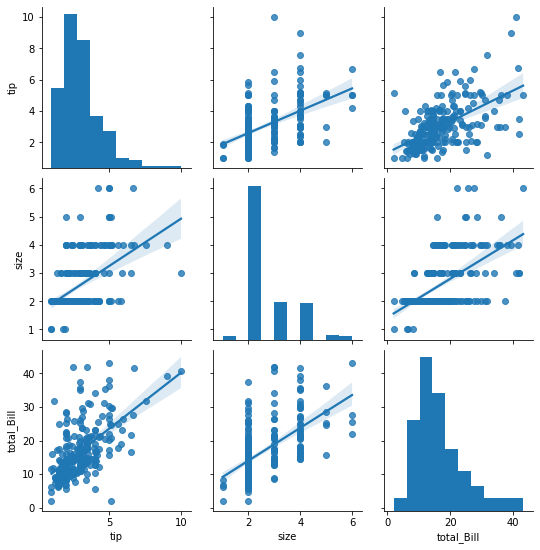

In [48]:
sns.pairplot(df,kind="reg")

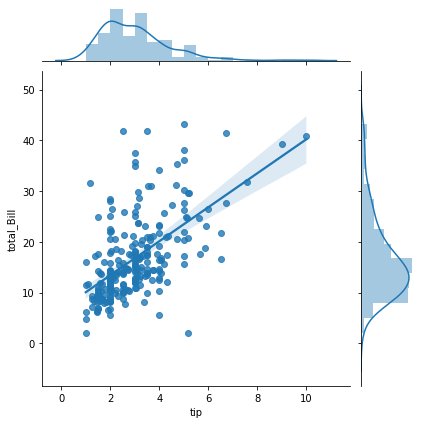

In [51]:
sns.jointplot(x="tip",y="total_Bill",data=df,kind="reg")

In [56]:
import statsmodels.api as sm
x=df[["tip"]]
x=sm.add_constant(x)
x.head()

,const,tip
0,1.0,1.01
1,1.0,1.66
2,1.0,3.50
3,1.0,3.31
4,1.0,3.61


In [59]:
y=df["total_Bill"]

In [60]:
lm=sm.OLS(y,x)

In [64]:
model=lm.fit()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_Bill   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           5.02e-23
Time:                        13:39:41   Log-Likelihood:                -804.77
No. Observations:                 244   AIC:                             1614.
Df Residuals:                     242   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7503      1.006      6.707      0.000       4.768       8.733
tip            3.3477      0.305     10.980      0.000       2.747       3.948
==============================================================================
Omnibus:                       58.831   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.799
Skew:                           1.185   Prob(JB):                     5.87e-27
Kurtosis:                       5.502   Cond. No.                         8.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

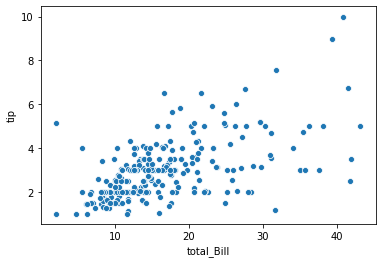

In [69]:
sns.scatterplot("total_Bill","tip",data=df)

Text(0.5, 0, 'TV Harcamaları')

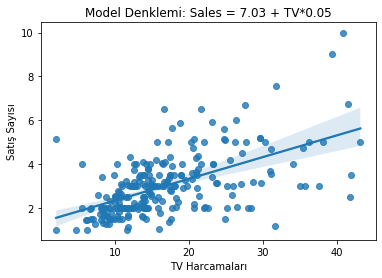

In [77]:
g= sns.regplot(df["total_Bill"], df["tip"])
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")

In [78]:
from sklearn.linear_model import LinearRegression

In [86]:
x=df[["tip"]]
y=df[["total_Bill"]]
ln=LinearRegression()
model=ln.fit(x,y)

In [87]:
y_pred=model.predict(x)

In [92]:
y_pred[0:5]

array([[10.13147512],
       [12.30748936],
       [18.4672835 ],
       [17.8312178 ],
       [18.83553206]])

In [101]:
import statsmodels.formula.api as smf

In [102]:
lm = smf.ols("total_Bill~ tip", df)
model = lm.fit()

In [103]:
from sklearn.metrics import mean_squared_error,r2_score

In [106]:
mse=mean_squared_error(y,model.fittedvalues)
mse

42.88823752111094

In [108]:
import numpy as np

In [110]:
rmse=np.sqrt(mse)
rmse

6.5489111706535565

In [122]:
Karsilastir=pd.DataFrame({"gercek":[1,2,3,4,5],
                        "tahmin":[2,3,4,5,3]})
xdegeri=df["tip"]
ydegeri=df["total_Bill"]
xdegeri[0:5]

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [121]:
ydegeri[0:5]

0    15.98
1     8.68
2    17.51
3    20.37
4    20.98
Name: total_Bill, dtype: float64

In [128]:
ytahmin= model.predict(xdegeri)
ytahmin[0:5]

0    10.131475
1    12.307489
2    18.467283
3    17.831218
4    18.835532
dtype: float64

In [131]:
karsilastir=pd.DataFrame({"gercek": ydegeri,
                        "tahmin": ytahmin})
karsilastir

,gercek,tahmin
0,15.98,10.131475
1,8.68,12.307489
2,17.51,18.467283
3,20.37,17.831218
4,20.98,18.835532
...,...,...
239,23.11,26.568752
240,25.18,13.445712
241,20.67,13.445712
242,16.07,12.608784


In [132]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# PCR model

In [83]:
#amerikan basketbol ligi verileri
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna() # bu veri setinde eksik gözlemler var. bunları direk eledik
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [84]:
dms=pd.get_dummies(df[['League','Division','NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [85]:
y=df["Salary"]

In [86]:
x_=df.drop(["Salary","League","Division","NewLeague"], axis=1)

In [87]:
x_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25


In [88]:
X=pd.concat([x_,dms[["League_N", "Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [89]:
import sklearn

In [90]:
from sklearn import model_selection as ms

In [91]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [92]:
X_train.shape

(197, 19)

In [93]:
X_test.shape

(66, 19)

In [94]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [95]:
pca=PCA()

In [96]:
X_reduce_train=pca.fit_transform(scale(X_train))

In [97]:
X_reduce_train[0:4]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03],
       [ 1.57074119e+00, -6.26413698e-01,  3.18877005e+00,
         1.16212040e+00, -1.53912925e+00, -6.18154504e-01,
         1.39000146e+00,  7.71385813e-01,  2.42590210e-01,
        -5.72553466e-01, -9.40145630e-02, -5.55425945e-02,
         4.10441448e-01,  1.66555516e-02,  2.06437495e-01,
         1.24418917e-02,  2.72401324e-02, -1.68108943e-01,
         1.20560996e-01],
       [ 1.50009234e+00, -1.72148910e+00, -1.68448622e+00,
        -9.96357906e-02,  1.13499306e+00, -3.53442413e-01,
         4.87946613e-02, -1.48548055e-01, -1.15344444e-01,
         3.86504437e-01,  1.10694687e-01, -2.40319632e-01,
    

In [98]:
np.cumsum(np. round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [99]:
pca.fit_transform(X_train)

array([[-2.42583842e+03, -1.39128183e+02, -5.78013198e+01, ...,
         8.40180901e-01,  4.57543451e-01,  2.03108922e-02],
       [ 2.16116114e+03, -1.02920107e+02,  3.51856814e+02, ...,
         2.37711454e-01,  1.94818675e-01,  1.13641753e-01],
       [ 1.32960286e+02,  4.87394959e+01,  9.64655914e+00, ...,
        -5.24231506e-01, -2.08521810e-01, -1.38828231e-02],
       ...,
       [-2.15189161e+03, -8.89603187e+01,  5.25179576e+00, ...,
        -5.08928825e-01, -5.50458373e-01,  4.73509246e-05],
       [ 1.77475320e+03, -1.36206470e+02, -1.87711631e+01, ...,
        -4.30244880e-01,  6.02298940e-01,  3.86603590e-02],
       [-2.15115230e+03, -5.29697795e-01,  2.62849475e+02, ...,
        -7.52717339e-01, -3.40873764e-01, -1.48306990e-03]])

In [213]:
np.cumsum(np. round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10]

array([ 97.29,  98.87,  99.33,  99.6 ,  99.8 ,  99.93,  99.98, 100.  ,
       100.  , 100.  ])

In [219]:
lm=LinearRegression()

In [220]:
pcr_model=lm.fit(X_reduce_train,y_train)

In [221]:
pcr_model.intercept_

543.4834416243655

In [223]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Tahmin

In [235]:
y_pred=pcr_model.predict(X_reduce_train)

In [236]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564977

In [237]:
r2_score(y_train,y_pred)

0.5770075250410178

In [238]:
pca2=PCA()

In [239]:
X_reduce_test=pca.fit_transform(scale(X_test))

In [241]:
y_pred_test=pcr_model.predict(X_reduce_test)

In [242]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

405.15753641499646

## Model tuning

In [243]:
lm= LinearRegression()

In [244]:
pcr_model=lm.fit(X_reduce_train,y_train)
y_pred=pcr_model.predict(X_reduce_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

405.15753641499646


In [246]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [247]:
from sklearn import model_selection

In [316]:
cv_10=model_selection.KFold(n_splits=10,#böl
                           shuffle=True,# karıştır
                           random_state=1)
RMSE=[]

In [253]:
np.arange(10,20,2)


(66, 19)

In [296]:
X_reduce_train

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01, ...,
         3.70733348e-03,  1.37933445e-03, -6.63814471e-03],
       [ 1.57074119e+00, -6.26413698e-01,  3.18877005e+00, ...,
         2.72401324e-02, -1.68108943e-01,  1.20560996e-01],
       [ 1.50009234e+00, -1.72148910e+00, -1.68448622e+00, ...,
         5.53398813e-02, -9.08519513e-02, -1.15464804e-02],
       ...,
       [-3.77250745e-01, -3.00549313e+00, -1.82464645e+00, ...,
         1.23657225e-03,  1.73951625e-02, -5.47217393e-04],
       [ 9.27889192e-01,  1.35566547e+00, -6.49981255e-01, ...,
        -1.94913051e-01, -4.31783126e-02,  1.73446277e-03],
       [-2.50242254e+00, -8.43529483e-01,  5.89109906e-01, ...,
         4.50587682e-02,  1.03607049e-01, -2.21172969e-02]])

In [317]:
for i in np.arange(0,X_reduce_test.shape[1]+1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                X_reduce_train[:,:i],
                y_train.ravel(), # ravel düzene sokuyor. yazmasakta bir şeyi değişmiyor diye gördüm denediğimde.
                cv=cv_10,
                scoring="neg_mean_squared_error")).mean()
    RMSE.append(score)


C:\Users\bedir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(177, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\bedir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(177, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\Users\bedir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Found array with 0 feature(s) (shape=(177, 0)) while a minimum of 1 is required.

  FitFailedWarning)
C:\User

In [318]:
for i in RMSE:
    print(i)

nan
333.59802164966027
330.43667300996935
330.27528833186346
330.66537380220933
326.45260847235363
323.9149947798536
323.2245904693249
326.55747999667017
328.9126496696056
334.720579425334
335.60726327139
339.85614360189425
345.5019883085344
351.2549439336468
352.10922513683664
338.3056464503755
338.00121434683905
337.2389991814374
344.20323640861034


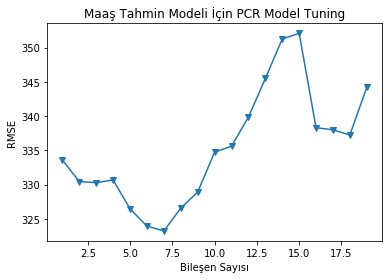

In [319]:
plt.plot(RMSE,'-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [320]:
lm=LinearRegression(X_reduce_train,y_train)

In [321]:
pcr_model_v=lm.fit(X_reduce_train[:,0:7],y_train)

In [323]:
y_pred_v=pcr_model_v.predict(X_reduce_train[:,0:7])

In [325]:
print(np.sqrt(mean_squared_error(y_train,y_pred_v)))

306.9776298667308


In [326]:
y_pred_vtest=pcr_model_v.predict(X_reduce_test[:,0:7])

In [329]:
print(np.sqrt(mean_squared_error(y_test,y_pred_vtest)))

391.9374992765452


# PLS

In [105]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [106]:
import pandas as pd 
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()
ms=pd.get_dummies(df[['League', 'Division', 'NewLeague']])
ms[0:2]


,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0


In [107]:
y=df["Salary"]

In [108]:
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_,ms[['League_N','Division_W','NewLeague_N']]],axis=1)

In [109]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.25,random_state=42)

In [110]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [111]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [112]:
pls_model=PLSRegression()

In [113]:
pls_fitted=pls_model.fit(X_train,y_train)

In [114]:
y_pred=pls_fitted.predict(X_train)

In [115]:
from sklearn.metrics import mean_squared_error, r2_score 

In [116]:
mlse=np.sqrt(mean_squared_error(y_pred,y_train))
mlse # train hatası

310.1167593109696

In [117]:
r2_score(y_train,y_pred)

0.5140424486535482

In [118]:
y_pred_test = pls_model.predict(X_test)

In [119]:
mlse_test=np.sqrt(mean_squared_error(y_pred_test,y_test))
mlse_test

398.09956327448526

## MODEL TUNİNG

In [196]:
from sklearn import model_selection 
import numpy as np

In [197]:
pls=PLSRegression(n_components=2)
cv_10=model_selection.KFold(n_splits=10,shuffle=True, random_state=1)
np.sqrt(-1*cross_val_score(pls,
                         X_train,
                         y_train,
                         cv=cv_10,
                         scoring='neg_mean_squared_error').mean())

332.3639761713549

In [198]:
pls=PLSRegression(n_components=5)
cv_10=model_selection.KFold(n_splits=10,shuffle=True, random_state=1)
np.sqrt(-1*cross_val_score(pls,
                           X_train,
                           y_train,
                           cv=cv_10,
                           scoring='neg_mean_squared_error').mean())

347.34060450905895

In [231]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [237]:
cv_10=model_selection.KFold(n_splits=10,shuffle=True, random_state=1)
RMSE=[]
RMSE2=[]
for i in np.arange(1,X_test.shape[1]+1):
    pls=PLSRegression(n_components=i)
    score=np.sqrt(-1*cross_val_score(pls,
                                X_train,
                                y_train,
                                cv=cv_10,
                               scoring="neg_mean_squared_error")).mean()
    model=pls.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mean_squared_error(y_pred,y_test)
    RMSE.append(score)

In [201]:
RMSE

[327.8076267799511,
 327.5178220787555,
 329.7564342804702,
 331.9319392446711,
 342.4658736135476,
 355.016545242922,
 357.2777243607114,
 347.6609984925577,
 341.90192093116536,
 340.5272923464332,
 338.7137472493426,
 337.30707696509705,
 335.78733375321576,
 339.8460588569017,
 340.1389890524407,
 339.9141721845118,
 340.3918728489855,
 340.23908803180865,
 344.20323640861]

In [202]:
RMSE2

[398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526,
 398.09956327448526]

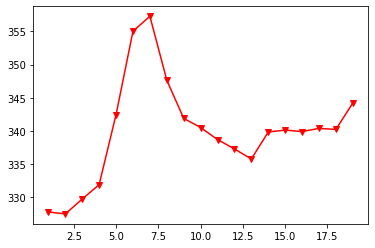

In [203]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] +1), np.array(RMSE), '-v', c = "r")

In [204]:
from sklearn.linear_model import LinearRegression

In [159]:
?PLSRegression

Init signature:
PLSRegression(
    n_components=2,
    scale=True,
    max_iter=500,
    tol=1e-06,
    copy=True,
)
Docstring:     
PLS regression

PLSRegression implements the PLS 2 blocks regression known as PLS2 or PLS1
in case of one dimensional response.
This class inherits from _PLS with mode="A", deflation_mode="regression",
norm_y_weights=False and algorithm="nipals".

Read more in the :ref:`User Guide <cross_decomposition>`.

.. versionadded:: 0.8

Parameters
----------
n_components : int, (default 2)
    Number of components to keep.

scale : boolean, (default True)
    whether to scale the data

max_iter : an integer, (default 500)
    the maximum number of iterations of the NIPALS inner loop (used
    only if algorithm="nipals")

tol : non-negative real
    Tolerance used in the iterative algorithm default 1e-06.

copy : boolean, default True
    Whether the deflation should be done on a copy. Let the default
    value to True unless you don't care about side effect

Attri

In [212]:
pls_model=PLSRegression(n_components=2)
pls_fitted=pls_model.fit(X_train,y_train)

In [213]:
y_pred=pls_model.predict(X_test)

In [214]:
np.sqrt(mean_squared_error(y_test,y_pred))

383.82007913508414

In [220]:
pls_model=PLSRegression(n_components=2)
pls_fitted=pls_model.fit(X_train,y_train)
y_pred=pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

In [222]:
?pca

Type:        PCA
String form:
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
File:        c:\users\bedir\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py
Docstring:  
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float, None or st

In [223]:
?PLSRegression

Init signature:
PLSRegression(
    n_components=2,
    scale=True,
    max_iter=500,
    tol=1e-06,
    copy=True,
)
Docstring:     
PLS regression

PLSRegression implements the PLS 2 blocks regression known as PLS2 or PLS1
in case of one dimensional response.
This class inherits from _PLS with mode="A", deflation_mode="regression",
norm_y_weights=False and algorithm="nipals".

Read more in the :ref:`User Guide <cross_decomposition>`.

.. versionadded:: 0.8

Parameters
----------
n_components : int, (default 2)
    Number of components to keep.

scale : boolean, (default True)
    whether to scale the data

max_iter : an integer, (default 500)
    the maximum number of iterations of the NIPALS inner loop (used
    only if algorithm="nipals")

tol : non-negative real
    Tolerance used in the iterative algorithm default 1e-06.

copy : boolean, default True
    Whether the deflation should be done on a copy. Let the default
    value to True unless you don't care about side effect

Attri

In [225]:
?PCA

Init signature:
PCA(
    n_components=None,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float, None or str
    Number of components to keep.
    if n_components is not set all

# Ridge Regression

In [59]:
import pandas as pd 
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df=df.dropna()
y=df["Salary"]
dm=pd.get_dummies(df[['League','Division','NewLeague']])
df=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
df=pd.concat([df,dm[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X=df.copy()

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.25,
                                              random_state=42)

In [63]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [64]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [66]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [85]:
import numpy as np
lambdalar=10**np.linspace(10,-2,100)*0.5
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

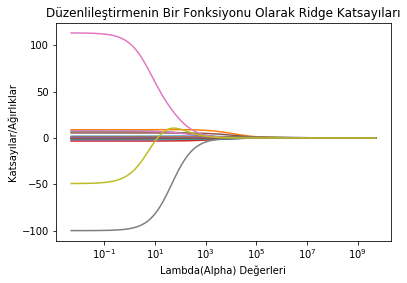

In [94]:
katsayilar=[]
for i in lambdalar:
    ridge_model=Ridge(alpha=i).fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)
import matplotlib.pyplot as plt
ax=plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')
plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

## model tuning

In [100]:
from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(alphas=lambdalar,
                scoring="neg_mean_squared_error",
                normalize=True)
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [101]:
ridge_cv.alpha_

0.7599555414764666

In [102]:
ridge_tuned=Ridge(alpha=ridge_cv.alpha_).fit(X_train,y_train)

In [108]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,ridge_tuned.predict(X_test)))

356.8583047271521

# Losso model

In [110]:
import pandas as pd 
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df=df.dropna()
y=df["Salary"]
dm=pd.get_dummies(df[['League','Division','NewLeague']])
df=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
df=pd.concat([df,dm[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X=df.copy()

In [131]:
LassoCV()

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [189]:
from sklearn.linear_model import Lasso,LassoCV
lambdalar=10**np.linspace(10,-2,100)*0.5
lasso_cv=LassoCV(alphas=lambdalar,
                max_iter=10000,
                 cv=10,
                normalize=True)

In [184]:
lasso_cv.fit(X_train,y_train)

LassoCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        copy_X=True, cv=20, eps=0.001, fit_intercept=True, max_iter=10000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [185]:
lasso_cv.alpha_

0.3289666123287841

In [186]:
lasso_tuned=Lasso(alpha=lasso_cv.alpha_).fit(X_train,y_train)

C:\Users\bedir\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252116.626715349, tolerance: 3898.686956380658
  positive)


In [187]:
y_pred=lasso_tuned.predict(X_test)

In [188]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.5725294630476

# Doğrusal Olmayan Regreson Modelleri

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

## KNN

In [6]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsRegressor
knn_params={'n_neighbors':np.arange(1,30,1)}
knn=KNeighborsRegressor()
knn_cv_model=GridSearchCV(knn,knn_params,cv=10)
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [9]:
knn_tuned=KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_['n_neighbors'])

In [10]:
knn_tuned.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [12]:
y_pred=knn_tuned.predict(X_test)
from sklearn.metrics import mean_squared_error 
np.sqrt(mean_squared_error(y_pred,y_test))

413.7094731463598

## Doğrusal SVR

In [4]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms=pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y=df["Salary"]
X_=df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X=pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [5]:
X_train = pd.DataFrame(X_train["Hits"]) # bağımlı değişkenimi hala aynı, salert
X_test = pd.DataFrame(X_test["Hits"])# bağımsız değişkenimizi Hits olarak seçtik

In [6]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [11]:
svr_params={"C":np.arange(0.1,2,0.4)}
svr_model=SVR("linear").fit(X_train,y_train)
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=10)
svr_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.5, 0.9, 1.3, 1.7])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
svr_cv_model.best_params_

{'C': 0.1}

In [14]:
svr_tuned=SVR("linear",C=0.1).fit(X_train, y_train)

In [16]:
y_pred = svr_tuned.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

# Doğrusal Olmayan SVR

In [57]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms=pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y=df["Salary"]
X_=df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X=pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [63]:
radial_svr=SVR("rbf")
params={"C": [0.05,0.1,1,2,5,10,30,50,70,100,200,500,5000,10000,50000]}
svr_cv=GridSearchCV(radial_svr,params,cv=10).fit(X_train,y_train)
svr_cv

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.05, 0.1, 0.9, 2, 5, 10, 30, 50, 70, 100, 200,
                               500, 5000, 10000, 50000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
svr_cv.best_params_

{'C': 5000}

In [65]:
svr_tuned=SVR("rbf",C=svr_cv.best_params_["C"]).fit(X_train, y_train)

In [66]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

376.6274192770624

In [67]:
svr_tuned=SVR("rbf",C=20).fit(X_train, y_train)
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

427.7941540882809

# Yapay Sinir Ağları

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms=pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y=df["Salary"]
X_=df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X=pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [68]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler=StandardScaler()
scaler=scaler.fit(X_train);

In [77]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
from sklearn.neural_network import MLPRegressor

In [82]:
mlp_model=MLPRegressor()

In [81]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']} 

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
mlp_cv_model=GridSearchCV(mlp_model,mlp_params,cv=10,n_jobs=-1).fit(X_train_scaled,y_train)

In [88]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 50, 150)}

In [90]:
mls_tuned=MLPRegressor(alpha=0.02,hidden_layer_sizes=(100,50,150))

In [91]:
mls_tuned.fit(X_train_scaled,y_train)

MLPRegressor(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 50, 150), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
y_pred=mls_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_pred,y_test))

# Karar ağaçları

**min_samples_split**, bir dahili düğümü bölmek için gereken minimum örnek sayısını temsil eder

**max_depth** ağacın ne kadar derin olabileceğini gösterir. Ağaç ne kadar derinse, sahip olduğu bölünmeler o kadar fazladır ve veriler hakkında daha fazla bilgi toplar.

**min_samples_leaf**  şudur: Bir yaprak düğümde olması gereken minimum örnek sayısı


In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [3]:
# öncelikle değişkenler iseçerek bunu uygulayacağız.
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
cart_model=DecisionTreeRegressor()
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}
card_cv_model=GridSearchCV(cart_model,cart_params,cv=10)
card_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)},
             pre_dispatch='2*n_jobs

In [6]:
card_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [7]:
card_tuned=DecisionTreeRegressor(max_leaf_nodes=9,min_samples_split=76)

In [9]:
card_tuned.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=9,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=76,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
y_pred=card_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

423.406689243066

# Bagged Trees Regresyon

In [46]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [47]:
from sklearn.ensemble import BaggingRegressor

In [48]:
params={'n_estimators':range(0,20)}

In [49]:
bag_model=BaggingRegressor(bootstrap_features=True).fit(X_train,y_train)

In [50]:
bag_cv_model=GridSearchCV(bag_model,params,cv=10).fit(X_train,y_train)

In [51]:
bag_cv_model.best_params_

{'n_estimators': 12}

In [52]:
bag_tuned=BaggingRegressor(bootstrap_features=True,
                           n_estimators=bag_cv_model.best_params_['n_estimators'])
bag_tuned.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=12,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [53]:
y_pred=bag_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

351.47256672609836

# Random Forests

In [79]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model=RandomForestRegressor().fit(X_train,y_train)
params={'n_estimators':[100,500,1000,2000],
       'max_depth':list(range(1,10)),
        'max_features':[3,5,10,15]}
                        
rf_cv_model=GridSearchCV(rf_model,
                         params,
                         cv=10,
                         n_jobs=-1)

In [ ]:
rf_cv_model.fit(X_train,y_train)

In [69]:
rf_cv_model.best_params_

{'max_depth': 7, 'max_features': 3, 'n_estimators': 100}

In [70]:
rf_tuned = RandomForestRegressor(max_depth  = 7, 
                                 max_features = 3,# bölünmelerde göz önünde bulunduracagı 
                                 #max değişken sayısı parametresi=3
                                 n_estimators =200)

In [71]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [72]:
y_pred = rf_tuned.predict(X_test)

In [73]:
np.sqrt(mean_squared_error(y_test, y_pred))

349.18428561651734

In [77]:
rf_tuned.feature_importances_ #değişkenlerin önem sırası

array([0.04293144, 0.05214347, 0.03150022, 0.04213909, 0.04856085,
       0.05375856, 0.04015594, 0.09325665, 0.11024201, 0.07153635,
       0.11316101, 0.11406793, 0.09748243, 0.04733111, 0.01781142,
       0.01485216, 0.00318219, 0.00247275, 0.0034144 ])

In [88]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100, },
             index=X_train.columns)
Importance.head()

,Importance
AtBat,4.293144
Hits,5.214347
HmRun,3.150022
Runs,4.213909
RBI,4.856085


Text(0.5, 0, 'Değişken Önem Düzeyleri')

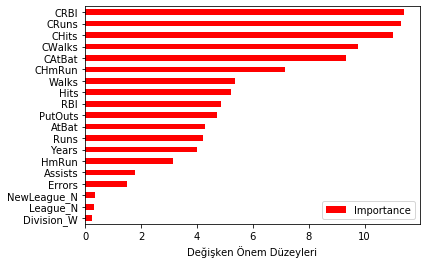

In [89]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

**sonraki göreceğimiz algoritmalar için Bir mihenk taşıdır** 

Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.

Bagging'da ağaçlar bağımsızkeni boosting de ağaçların bagımlılıgı söz konusu.


In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75], # alt örnek
}
gbm_model=GradientBoostingRegressor().fit(X_train,y_train)
gbm_cv_model=GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2)
#vverbose= iterasyonları gözlemleme ile alakalı bişeymiş

In [4]:
gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  8.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_...
                            

In [6]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}

In [10]:
gbm_tuned=GradientBoostingRegressor(learning_rate= 0.01,
                                    max_depth= 8,
                                    n_estimators= 1000,
                                    subsample= 0.5)

In [11]:
gbm_tuned=gbm_tuned.fit(X_train,y_train)

In [12]:
y_pred=gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

333.283128410909

# XGBoost

In [49]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [53]:
!pip install xgboost

In [54]:
import xgboots as xgb

ModuleNotFoundError: No module named 'xgboots'

In [55]:
from xgboost import XGBRegressor

In [56]:
xgb_model=XGBRegressor()
xgb_model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [57]:
params={
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], #ağaç başşında değişkenlerden alınacak örnek oranı
     'n_estimators':[100, 200, 500, 1000],# ağaç şeysi.
     'max_depth': [2,3,4,5,6], #overfitin önünne geçmekiçin, karmaşıklık parametresi
     'learning_rate': [0.1, 0.01, 0.5] # daraltma adım boyu, owerfiti engellemek için.
}

In [58]:
from sklearn.model_selection import GridSearchCV
xgb_cv_model=GridSearchCV(xgb_model,
                          params,
                          n_jobs=-1,
                         verbose=2,
                         cv=10)

In [59]:
xgb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 1930 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 2522 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  1.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estim...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [63]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [154]:
xgb_tuned=XGBRegressor(
 colsample_bytree= 0.5,
 learning_rate= 0.1,
 max_depth= 2,
 n_estimators= 500)
xgb_tuned=xgb_tuned.fit(X_train,y_train)

In [155]:
y_pred=xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

346.0275157777717

In [156]:
y_pred_train=xgb_tuned.predict(X_train)
np.sqrt(mean_squared_error(y_pred_train,y_train))

23.43618260960554

In [157]:
TRA=pd.DataFrame(y_train)

In [158]:
TRAP=pd.DataFrame(y_pred_train,index=y_train.index)

In [159]:
pd.concat([TRA,TRAP],axis=1)

,Salary,0
183,125.000,125.154846
229,1940.000,1921.328125
286,940.000,928.155762
102,375.000,365.273254
153,100.000,159.747452
...,...,...
24,776.667,785.666687
236,750.000,751.223022
93,145.000,168.951080
137,430.000,418.557770


In [160]:
TRAte=pd.DataFrame(y_test)
TRAPte=pd.DataFrame(y_pred,index=y_test.index)
pd.concat([TRAte,TRAPte],axis=1)

,Salary,0
148,850.0,689.965332
154,277.5,729.055054
318,875.0,1384.563965
279,150.0,185.114838
88,260.0,595.289612
...,...,...
122,400.0,492.657440
282,90.0,670.789673
111,385.0,437.488647
232,450.0,476.409607


# Light GBM

In [162]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [163]:
!pip install lightgbm

In [164]:
from lightgbm import LGBMRegressor

In [168]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor().fit(X_train,y_train)
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [170]:
lgbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 1828 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 2960 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 4420 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 8308 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  2.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 

In [174]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 40}

In [175]:
lgbm_tuned=LGBMRegressor(colsample_bytree=0.5,
                        learning_rate=0.1,
                        max_depth=5,
                        n_estimators=40)

In [176]:
lgbm_tuned.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
              importance_type='split', learning_rate=0.1, max_depth=5,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=40, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [177]:
y_pred=lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))

372.6362243138388

# CatBoost

**Category Boosting**

In [171]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [172]:
!pip install catboost

In [173]:
from catboost import CatBoostRegressor

In [188]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [189]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [190]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 12.7min finished


0:	learn: 422.4143448	total: 1.92ms	remaining: 1.92s
1:	learn: 404.1864276	total: 3.6ms	remaining: 1.79s
2:	learn: 386.3231718	total: 4.75ms	remaining: 1.58s
3:	learn: 370.5548032	total: 6.05ms	remaining: 1.51s
4:	learn: 354.9242038	total: 7.45ms	remaining: 1.48s
5:	learn: 342.3403984	total: 8.74ms	remaining: 1.45s
6:	learn: 328.2370070	total: 9.95ms	remaining: 1.41s
7:	learn: 317.5056526	total: 11.4ms	remaining: 1.41s
8:	learn: 306.6243511	total: 12.6ms	remaining: 1.38s
9:	learn: 297.3147023	total: 13.7ms	remaining: 1.35s
10:	learn: 288.3685892	total: 14.8ms	remaining: 1.33s
11:	learn: 281.0996220	total: 16ms	remaining: 1.31s
12:	learn: 273.2254898	total: 17.1ms	remaining: 1.3s
13:	learn: 266.9003385	total: 18.2ms	remaining: 1.28s
14:	learn: 261.9092500	total: 19.3ms	remaining: 1.27s
15:	learn: 256.2637350	total: 20.6ms	remaining: 1.26s
16:	learn: 250.3667935	total: 21.7ms	remaining: 1.25s
17:	learn: 244.8631098	total: 23ms	remaining: 1.25s
18:	learn: 240.1540669	total: 24.2ms	remaini

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001CD39BAC448>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [191]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [192]:
catb_tuned=CatBoostRegressor(depth=5,
                            iterations=1000,
                            learning_rate=0.1)

In [193]:
catb_tuned.fit(X_train,y_train)

0:	learn: 422.4143448	total: 7.48ms	remaining: 7.47s
1:	learn: 404.1864276	total: 8.97ms	remaining: 4.47s
2:	learn: 386.3231718	total: 10.3ms	remaining: 3.42s
3:	learn: 370.5548032	total: 11.6ms	remaining: 2.89s
4:	learn: 354.9242038	total: 12.9ms	remaining: 2.56s
5:	learn: 342.3403984	total: 14.2ms	remaining: 2.35s
6:	learn: 328.2370070	total: 16.1ms	remaining: 2.28s
7:	learn: 317.5056526	total: 17.3ms	remaining: 2.14s
8:	learn: 306.6243511	total: 18.4ms	remaining: 2.03s
9:	learn: 297.3147023	total: 19.5ms	remaining: 1.93s
10:	learn: 288.3685892	total: 20.7ms	remaining: 1.86s
11:	learn: 281.0996220	total: 22.1ms	remaining: 1.81s
12:	learn: 273.2254898	total: 23.2ms	remaining: 1.76s
13:	learn: 266.9003385	total: 24.5ms	remaining: 1.72s
14:	learn: 261.9092500	total: 26.2ms	remaining: 1.72s
15:	learn: 256.2637350	total: 27.5ms	remaining: 1.69s
16:	learn: 250.3667935	total: 28.9ms	remaining: 1.67s
17:	learn: 244.8631098	total: 30.1ms	remaining: 1.64s
18:	learn: 240.1540669	total: 31.3ms	r

In [194]:
y_pred=catb_tuned.predict(X_test)

In [195]:
np.sqrt(mean_squared_error(y_pred,y_test))

356.665762904938

# sınıflandırma 

In [10]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon 
optimize edilecek parametresi yok 

In [4]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)

In [5]:
from sklearn.linear_model import LogisticRegression

In [10]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred=loj_model.predict(X)

In [14]:
y_pred[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [24]:
loj_model.predict_proba(X)[0:10]

array([[0.35040711, 0.64959289],
       [0.91701929, 0.08298071],
       [0.22474085, 0.77525915],
       [0.92138876, 0.07861124],
       [0.1672242 , 0.8327758 ],
       [0.79898675, 0.20101325],
       [0.88019106, 0.11980894],
       [0.2781269 , 0.7218731 ],
       [0.32060943, 0.67939057],
       [0.92272884, 0.07727116]])

In [15]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [16]:
accuracy_score(y,y_pred)

0.7747395833333334

In [18]:
cross_val_score(loj,X,y,cv=10).mean()

0.7669685577580314

In [19]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [65]:
roc_curve(y, loj_model.predict_proba(X)[:,1]) #3 farklı array uretir.

(array([0.   , 0.   , 0.   , 0.002, 0.002, 0.004, 0.004, 0.006, 0.006,
        0.008, 0.008, 0.01 , 0.01 , 0.012, 0.012, 0.014, 0.014, 0.016,
        0.016, 0.018, 0.018, 0.022, 0.022, 0.026, 0.026, 0.032, 0.032,
        0.034, 0.034, 0.036, 0.036, 0.038, 0.038, 0.04 , 0.04 , 0.046,
        0.046, 0.048, 0.048, 0.05 , 0.05 , 0.052, 0.052, 0.054, 0.054,
        0.06 , 0.06 , 0.062, 0.062, 0.064, 0.064, 0.07 , 0.07 , 0.072,
        0.072, 0.074, 0.074, 0.076, 0.076, 0.078, 0.078, 0.082, 0.082,
        0.084, 0.084, 0.086, 0.086, 0.09 , 0.09 , 0.102, 0.102, 0.104,
        0.104, 0.106, 0.106, 0.108, 0.108, 0.11 , 0.11 , 0.116, 0.116,
        0.118, 0.118, 0.12 , 0.12 , 0.124, 0.124, 0.126, 0.126, 0.128,
        0.128, 0.138, 0.138, 0.14 , 0.14 , 0.144, 0.144, 0.156, 0.156,
        0.158, 0.158, 0.16 , 0.16 , 0.168, 0.168, 0.178, 0.178, 0.18 ,
        0.18 , 0.184, 0.184, 0.188, 0.188, 0.19 , 0.19 , 0.192, 0.192,
        0.194, 0.194, 0.198, 0.198, 0.2  , 0.2  , 0.206, 0.206, 0.21 ,
      

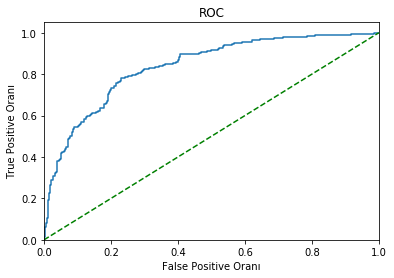

In [66]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

# Gaussian Naive Bayes
optimize edilecek parametresi yok 

In [74]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)


In [68]:
from sklearn.naive_bayes import GaussianNB

In [72]:
nb=GaussianNB()
nb_model=nb.fit(X_train,y_train)

In [76]:
from sklearn.metrics import mean_squared_error
y_pred=nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [77]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN

In [78]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [92]:
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,50)}
knn_cv_model=GridSearchCV(knn,params,cv=10)

In [93]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [94]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [95]:
knn_cv_model.best_score_

0.748637316561845

In [96]:
knn_t=KNeighborsClassifier(n_neighbors=11)
knn_tuned=knn_t.fit(X_train,y_train)

In [99]:
knn_tuned.score(X_test,y_test)

0.7316017316017316

In [100]:
# skoru şöylede hesaplayabiliriz: 
y_pred=knn_tuned.predict(X_test)
accuracy_score(y_pred,y_test)

0.7316017316017316

# SVC (Destek Vektör Makineleri)

In [120]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [121]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV

In [122]:
params={"C":np.arange(4,6)}
svc=SVC(kernel="linear")
svc_cv_model=GridSearchCV(svc,params,cv=10,n_jobs=-1,verbose=2)

In [123]:
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   53.7s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1, param_grid={'C': array([4, 5])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [124]:
svc_cv_model.best_params_

{'C': 5}

In [126]:
svc_tuned=SVC(kernel="linear",C=5).fit(X_train,y_train)
y_pred=svc_tuned.predict(X_test)
accuracy_score(y_pred,y_test)

0.7445887445887446

# RBF SVC
## doğrusal olmayan destek vektör

In [174]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [181]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100], # oluşacak olan
                  #düzlemin oluşmasını kontrol etmekle alakalli bir şeyler
              
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}#

In [182]:
svc_model=SVC(kernel="rbf")
svc_cv_model=GridSearchCV(svc_model,
                          svc_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    2.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [183]:
svc_cv_model.best_params_

{'C': 10, 'gamma': 0.0001}

In [186]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [187]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Yapay Sinir Ağları

In [188]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [190]:
from sklearn.preprocessing import StandardScaler

In [197]:
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [198]:
from sklearn.neural_network import MLPClassifier
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001], # ceza paramtresi
              "hidden_layer_sizes": [(10,10,10), # gizli katmanlar 
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],# yöntemler
              "activation": ["relu","logistic"]}# aktivasyon fonksiyonları


In [199]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  5.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 

In [201]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [202]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [203]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [205]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7402597402597403

# CART
## classification and regression trees

In [4]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

NameError: name 'pd' is not defined

In [218]:
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier

In [222]:
params={"max_depth":range(1,10),
       "max_samples_split":list(range(2,50))}
cart = DecisionTreeClassifier()
cart_cv_model=GridSearchCV(cart,params,cv=10,n_jobs=-1,verbose=2)

In [223]:
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 4305 out of 4320 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    4.6s finished


In [224]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [231]:
cart_tuned=DecisionTreeClassifier(max_depth=5,
                                min_samples_split=19).fit(X_train,y_train)

In [232]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

In [20]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model=RandomForestClassifier()
params={"max_depth":[2,5,8,10],
       "max_features":[2,5,8],
       "n_estimators":[10,500,1000],
       "min_samples_split":[2,5,10],}
from sklearn.model_selection import GridSearchCV
rf_cv_model=GridSearchCV(rf_model,params,cv=10,n_jobs=-1,verbose=2)

In [23]:
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1013 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [25]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 10}


In [26]:
rf_tuned=RandomForestClassifier(max_depth=8,
                               max_features=5,
                               min_samples_split=10,
                               n_estimators=10)
rf_tuned.fit(X_train, y_train)
y_pred=rf_cv_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [43]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)

Text(0.5, 0, 'değişken önem düzeyleri')

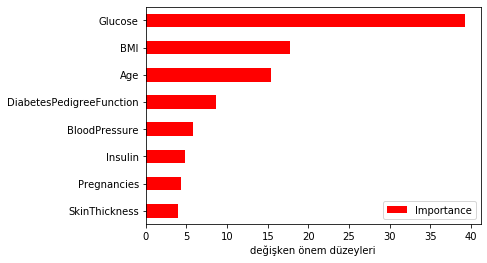

In [44]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="r")
plt.xlabel("değişken önem düzeyleri")

# Gradient Boosting Machines
Zayıf öğrencileri bir araya getirip güçlü nir öğrenci oluşturur 

In [11]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
gbm_model=GradientBoostingClassifier()
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}
gbm_cv_model=GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2)

In [14]:
gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [16]:
print("En iyi parametreler: " + str(gbm_cv_model.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [17]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [18]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [19]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

# XGBoost

In [ ]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
xgb_params={        
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}
xgb_model=XGBClassifier()
xgbm_cv_model=GridSearchCV(xgb_model,xgb_params,cv=10,n_jobs=-1,verbose=2)

In [55]:
xgbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 437 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 1085 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1530 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2057 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2664 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3353 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4122 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4973 tasks      | elapsed:  8.5min


[12:02:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 10.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

In [56]:
xgbm_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [57]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [58]:
xgb_tuned =  xgb.fit(X_train,y_train)

[12:02:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [59]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# LightGBM

In [60]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [62]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [63]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [64]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [65]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  8.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'ma

In [66]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 500,
 'subsample': 0.6}

In [67]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [68]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [69]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# CatBoost

In [74]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [75]:
#!pip install catboost
from catboost import CatBoostClassifier

In [76]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [77]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   48.5s finished


0:	learn: 0.6863412	total: 63.2ms	remaining: 12.6s
1:	learn: 0.6811322	total: 67.4ms	remaining: 6.67s
2:	learn: 0.6753199	total: 71.6ms	remaining: 4.7s
3:	learn: 0.6697717	total: 76.4ms	remaining: 3.74s
4:	learn: 0.6642090	total: 80.7ms	remaining: 3.15s
5:	learn: 0.6577038	total: 85ms	remaining: 2.75s
6:	learn: 0.6522290	total: 89.4ms	remaining: 2.46s
7:	learn: 0.6466015	total: 94.1ms	remaining: 2.26s
8:	learn: 0.6408068	total: 99ms	remaining: 2.1s
9:	learn: 0.6358218	total: 104ms	remaining: 1.97s
10:	learn: 0.6300444	total: 108ms	remaining: 1.86s
11:	learn: 0.6240992	total: 113ms	remaining: 1.77s
12:	learn: 0.6196618	total: 117ms	remaining: 1.69s
13:	learn: 0.6149237	total: 122ms	remaining: 1.62s
14:	learn: 0.6093146	total: 127ms	remaining: 1.56s
15:	learn: 0.6047282	total: 132ms	remaining: 1.51s
16:	learn: 0.6013242	total: 136ms	remaining: 1.47s
17:	learn: 0.5958624	total: 141ms	remaining: 1.42s
18:	learn: 0.5903733	total: 145ms	remaining: 1.38s
19:	learn: 0.5866505	total: 150ms	rema

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [78]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [79]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6616627	total: 4.29ms	remaining: 853ms
1:	learn: 0.6400771	total: 6.15ms	remaining: 609ms
2:	learn: 0.6218613	total: 7.86ms	remaining: 516ms
3:	learn: 0.6091958	total: 9.49ms	remaining: 465ms
4:	learn: 0.5938260	total: 11.2ms	remaining: 435ms
5:	learn: 0.5777363	total: 12.5ms	remaining: 405ms
6:	learn: 0.5641154	total: 14.7ms	remaining: 406ms
7:	learn: 0.5465291	total: 16.6ms	remaining: 398ms
8:	learn: 0.5343176	total: 18.6ms	remaining: 395ms
9:	learn: 0.5253371	total: 20.6ms	remaining: 392ms
10:	learn: 0.5152429	total: 22.4ms	remaining: 385ms
11:	learn: 0.5039035	total: 24ms	remaining: 376ms
12:	learn: 0.4940833	total: 25.4ms	remaining: 366ms
13:	learn: 0.4869167	total: 26.9ms	remaining: 357ms
14:	learn: 0.4800142	total: 28.3ms	remaining: 349ms
15:	learn: 0.4744378	total: 29.9ms	remaining: 344ms
16:	learn: 0.4684316	total: 31.3ms	remaining: 337ms
17:	learn: 0.4619170	total: 32.6ms	remaining: 329ms
18:	learn: 0.4560716	total: 33.9ms	remaining: 323ms
19:	learn: 0.4520436	tot

In [80]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# Gözetimsiz öğrenme 

k means 

hiyerarşik kümeleme

temel bileşen analizi

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns;
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [120]:
df = pd.read_csv("USArrests.csv").copy()
df.head(1)
#aşagıfdaki unnamed sorununu çözelim


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2


In [121]:
df.index=df.iloc[:,0]

In [122]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [123]:
df=df.iloc[:,1:5]

In [124]:
df.head(1)

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2


In [125]:
from sklearn.cluster import KMeans

In [131]:
kmeans=KMeans(n_clusters=2)

In [132]:
k_fit=kmeans.fit(df)

In [133]:
k_fit.cluster_centers_

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

In [134]:
k_fit.n_clusters

2

In [135]:
k_fit.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [144]:
kumeler=k_fit.labels_
merkezler=k_fit.cluster_centers_
merkezler

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

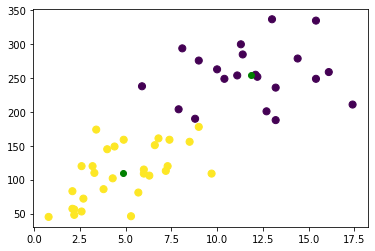

In [151]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler, s=50,cmap="viridis")
plt.scatter(merkezler[:,0],merkezler[:,1],c="green")

In [152]:
from mpl_toolkits.mplot3d import Axes3D

In [165]:
kmeans=KMeans(n_clusters=3)
k_fit=kmeans.fit(df)
kumeler=k_fit.labels_
merkezler=kmeans.cluster_centers_
merkezler[:,1]

array([173.28571429,  87.55      , 272.5625    ])

In [166]:
merkezler[1]

array([ 4.27, 87.55, 59.75, 14.39])

In [167]:
merkezler

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  4.27      ,  87.55      ,  59.75      ,  14.39      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ]])

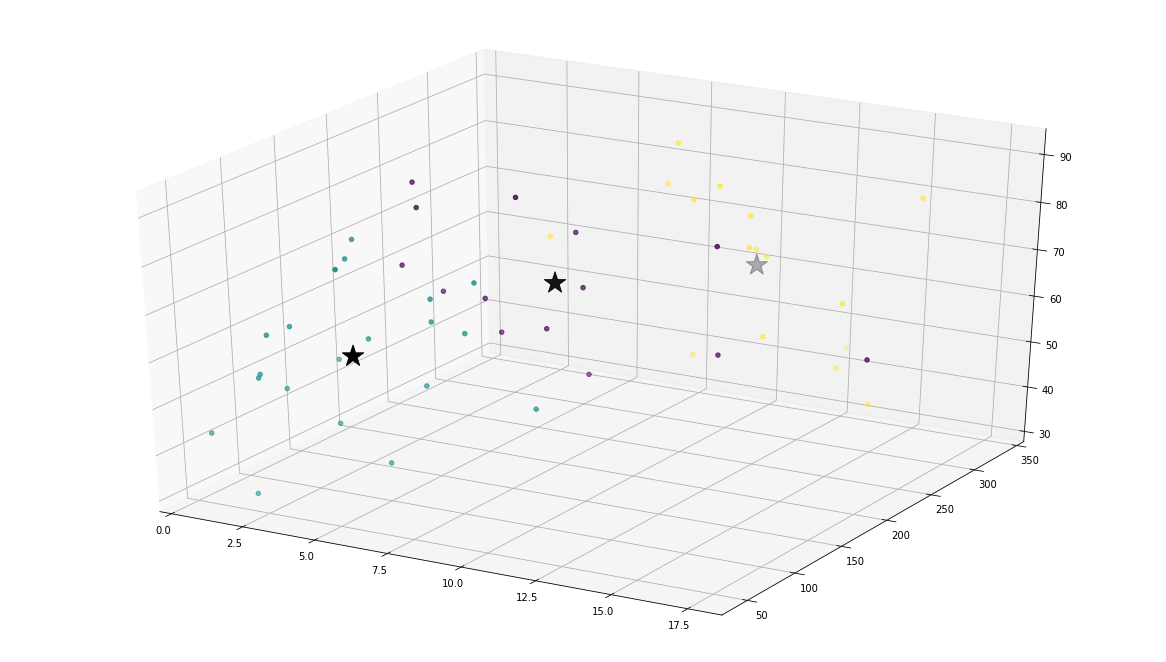

In [179]:
plt.rcParams['figure.figsize']=(16,9)
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=kumeler)
ax.scatter(merkezler[:,0],merkezler[:,1],merkezler[:,2],
          marker="*",s=500,c="black")

In [185]:
pd.DataFrame({"Eyaletler":df.index,"kumeler":kmeans.labels_}).head(7)

,Eyaletler,kumeler
0,Alabama,2
1,Alaska,2
2,Arizona,2
3,Arkansas,0
4,California,2
5,Colorado,0
6,Connecticut,1


# Optimum Kume Sayısının Belirlenmesi

In [187]:
#!pip install yellowbrick

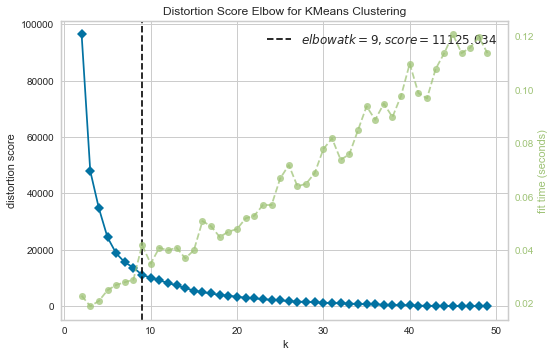

In [188]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(2,50))
visualizer.fit(df)
visualizer.poof()

# Hiyerarşik Kümeleme

In [189]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [220]:
from scipy.cluster.hierarchy import linkage
hc_complete=linkage(df,"complete")
hc_average=linkage(df,"average")
hc_single=linkage(df,"single")

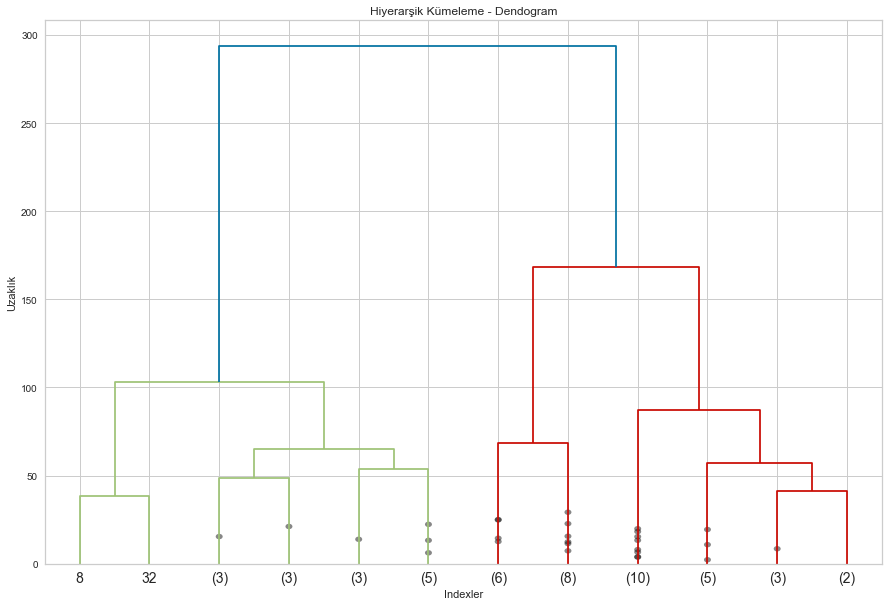

In [218]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
hc_complate,
truncate_mode="lastp",
p=12,
leaf_font_size=14,
show_contracted=True);

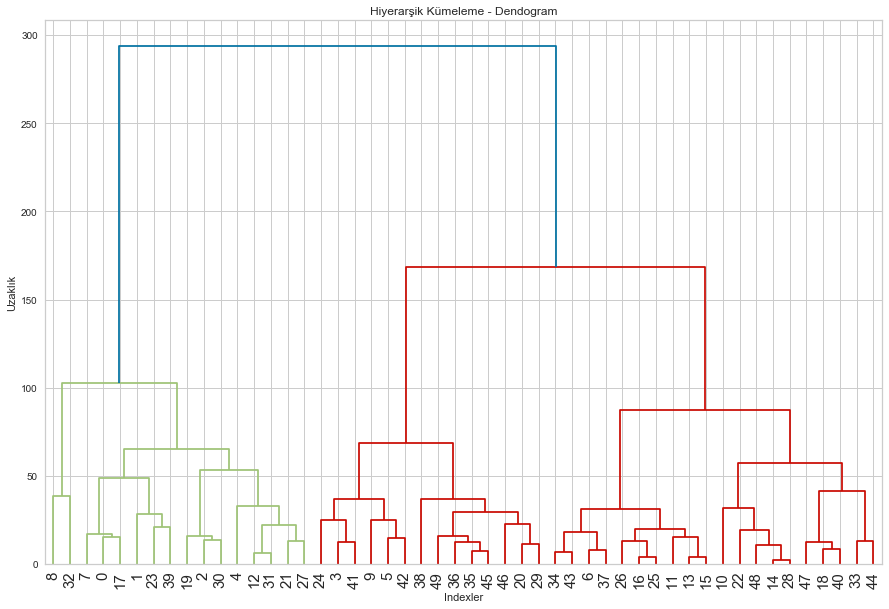

In [221]:

## optimum küme sayısı
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=15
);

In [222]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,
                               affinity="euclidean",
                               linkage="ward")
cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [223]:
pd.DataFrame({"Eyaletler":df.index,"Kumeler":cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# PCA
**Temel bileşen analizi.**

In [15]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [16]:
from sklearn.preprocessing import StandardScaler
df=StandardScaler().fit_transform(df)

In [17]:
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [33]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca_fit=pca.fit_transform(df)

In [34]:
bilesen_df=pd.DataFrame(data=pca_fit,columns=["bir","iki","uc"])
bilesen_df.head()

,bir,iki,uc
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [27]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [35]:
pca=PCA().fit(df)

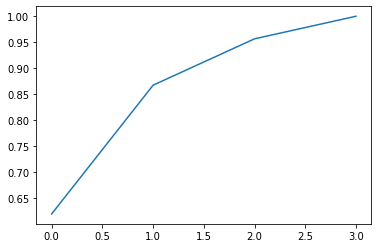

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))